In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\TJ\anaconda3\envs\ml01-02\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
# 이진 분류 예측 모델
# 사용할 알고리즘 : LogisticRegression
from sklearn.linear_model import LogisticRegression

# 데이터 정규화(표준화)
from sklearn.preprocessing import StandardScaler

# 학습 , 테스트 분리
from sklearn.model_selection import train_test_split

# 성능 평가
from sklearn.metrics import accuracy_score # 정확도
from sklearn.metrics import confusion_matrix # 오차행렬
from sklearn.metrics import precision_score # 정밀도
from sklearn.metrics import recall_score # 재현율
from sklearn.metrics import precision_recall_curve # 정밀도,재현율 커브
from sklearn.metrics import f1_score # F1 스코어 (조화평균값)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [25]:
# 데이터 로딩 (피마인디언 데이터 당뇨병)
d_data = pd.read_csv('./data/diabetes.csv')

In [26]:
# 당뇨병 분포 확인
# 불균형 데이터 셋
# 0    500
# 1    268
d_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [27]:
d_data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [28]:
# 값의 크기 차이가 심함 --> 표준화 필요
# 데이터 타입 : object (string) => encoder
d_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [38]:
# 데이터 분리
# y = d_data['Outcome'] # Label
# X = d_data.drop('Outcome', axis=1, inplace = True) # Feature

# iloc VS loc
# iloc[행, 열] : 숫자 인덱스 기반 행 접근
# loc[행, 열] : 명시 인덱스 기반 행 접근
X = d_data.iloc[ : , :-1] # Feature
y = d_data.iloc[ : , -1] # Label

In [36]:
# train / test 분리
X_train, X_test, y_train, y_test =\
train_test_split(
      X
    , y
    , test_size = 0.2
    , random_state = 156
)

In [56]:
# LogisticRegression
lr_clf = LogisticRegression()
# 학습해서 모델 생성
lr_clf.fit(X_train, y_train)
# 테스트데이터에 대한 예측 값 추출
pred = lr_clf.predict(X_test)

# 성능 평가
get_clf_eval(y_test, pred)

오차 행렬
[[84 13]
 [24 33]]

    정확도: 0.7597, 정밀도: 0.7174, 재현율: 0.5789, F1 스코어: 0.6408, ROC: 0.7225
    


C:\Users\TJ\anaconda3\envs\ml01-02\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [54]:
# 오차행렬, 정밀도, 재현율 
def get_clf_eval(y_test=None, pred=None): # None 처리해서 빈값에러 안나게
    '''
    y_test : 답
    pred : 예측값
    '''
    confusion = confusion_matrix(y_test, pred) # 오차 행렬
    accu = accuracy_score(y_test, pred) # 정확도
    precision = precision_score(y_test, pred) # 정밀도
    recall = recall_score(y_test, pred) # 재현율
    f1 = f1_score(y_test, pred) # F1 Score (정밀도,재현율 조화평균)
    roc_auc = roc_auc_score(y_test, pred) # ROC -- 제일 중요
    
    print('오차 행렬')
    print(confusion)
    
    # 평가지표 출력
    result = \
    '''
    정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1 스코어: {3:.4f}, ROC: {4:.4f}
    '''
    print(result.format(accu, precision, recall, f1, roc_auc))

In [57]:
get_clf_eval(y_test, pred)

오차 행렬
[[84 13]
 [24 33]]

    정확도: 0.7597, 정밀도: 0.7174, 재현율: 0.5789, F1 스코어: 0.6408, ROC: 0.7225
    


In [58]:
len(y_test)

154

In [59]:
# 성능 향상
# 1. 알고리즘(LogisticRegression) 튜닝 : 하이퍼파라미터 조절
# 2. 데이터 전처리
# 3. 알고리즘 변경

In [99]:
# 임계값 확인 시각화 함수
def precision_recall_curve_plot(y_test=None, pred_proba_p=None):
    # 정밀도, 재현율, 임곗값 반환 (Tuple)
    precisions, recall, thresholds = \
    precision_recall_curve(y_test, pred_proba_p)
    
    # X축 : 임계값 , y축 : 정밀도, 재현율
    plt.figure(figsize=(6,4))
    thresholds_boundary = thresholds.shape[0]
    
    # 정밀도 표시
    plt.plot(
          thresholds # X 축
        , precisions[0:thresholds_boundary] # y축
        , linestyle='--' # 점선
        , label='precision'
    )
    
    # 정밀도 표시
    plt.plot(
          thresholds # X 축
        , recall[0:thresholds_boundary] # y축
        , linestyle='--' # 점선
        , label='recall'
    )
    
    # X축 스케일 조정 => 원래 스케일 : 0.2 단위 => 0.1 단위 변경
    start, end = plt.xlim() # X축 처음, 끝 값
    print(start, end)
    plt.xticks(
        np.round(
            np.arange(start,end, 0.1),2 # ,2 :반올림 위치 지정
        ) 
    )    
    
    plt.legend() # 범례
    plt.grid() # 그리드
    plt.show()

0.03572224400285008 1.0409633273552072


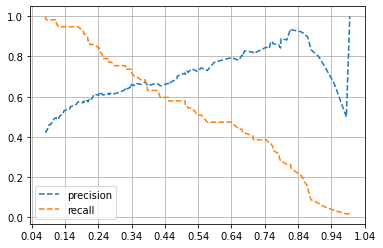

In [100]:
# 시각화
# y_test ; 원래 답 , pred_proba_p : 예측값이 1이 나올 확률
#precision_recall_curve_plot(y_test,pred)
# predict_proba() : 예측 확률 반환 (0 일 확률, 1일 확률 반환) 이진 분류

pred_proba_v = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_v)

In [102]:
# 데이터 분포
d_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

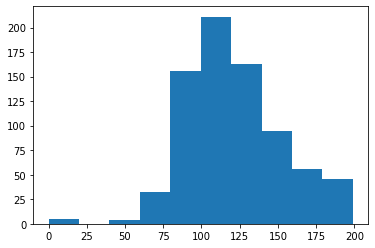

In [103]:
# 포도당 데이터 분포 시각화
plt.hist(
      d_data['Glucose'] # 데이터
    , bins = 10 # 분리할 갯수
)

In [122]:
# 컬럼 별 0 값 비율 확인
zero_features = [
    'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'
]

# 전체 데이터 개수
total_count = d_data['Glucose'].count()

# 컬럼별 0 비율 출력
for feature in zero_features:
    # 0 개수
    zero_count = d_data[d_data[feature]==0][feature].count()
    zero_ratio = zero_count / total_count * 100
    output_str = '{0} 컬럼의 0의 개수 {1}, 비율 {2:.2f} %'
    print(output_str.format(feature,zero_count,zero_ratio))

Glucose 컬럼의 0의 개수 0, 비율 0.00 %
BloodPressure 컬럼의 0의 개수 0, 비율 0.00 %
SkinThickness 컬럼의 0의 개수 0, 비율 0.00 %
Insulin 컬럼의 0의 개수 0, 비율 0.00 %
BMI 컬럼의 0의 개수 0, 비율 0.00 %


In [115]:
d_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### 결측치 처리

In [120]:
# 각각의 컬럼의 0값을 평균값으로 바꾼다 (replace)
# 각 컬럼 평균값 저장하는 변수 선언

mean_zero_features = d_data[zero_features].mean() # 팬시 인덱싱
# mean_zero_features_md = d_data[zero_features].median()
print(mean_zero_features)

Glucose          121.681605
BloodPressure     72.254807
SkinThickness     26.606479
Insulin          118.660163
BMI               32.450805
dtype: float64


In [121]:
# replace(찾을 값, 변경값)
d_data[zero_features] = d_data[zero_features].replace(0, mean_zero_features)
d_data[zero_features]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.000000,79.799479,33.6
1,85.0,66.0,29.000000,79.799479,26.6
2,183.0,64.0,20.536458,79.799479,23.3
3,89.0,66.0,23.000000,94.000000,28.1
4,137.0,40.0,35.000000,168.000000,43.1
...,...,...,...,...,...
763,101.0,76.0,48.000000,180.000000,32.9
764,122.0,70.0,27.000000,79.799479,36.8
765,121.0,72.0,23.000000,112.000000,26.2
766,126.0,60.0,20.536458,79.799479,30.1


### 값을 변경하고 다시 정규화 -> 모델 학습 -> 평가 실시

In [124]:
d_data.describe(())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [125]:
X = d_data.iloc[:, :-1] # feature
y = d_data.iloc[:, -1] # label

In [129]:
# StandardScaler 사용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [127]:
# train test 분리
X_train, X_test, y_train, y_test=\
train_test_split(
      X_scaled
    , y
    , test_size = 0.2
    , random_state = 156
)

In [130]:
# 모델 객체 생성 후 학습
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

# 성능 평가
get_clf_eval(y_test, pred)

오차 행렬
[[83 14]
 [25 32]]

    정확도: 0.7468, 정밀도: 0.6957, 재현율: 0.5614, F1 스코어: 0.6214, ROC: 0.7085
    


In [132]:
# 정확도: 0.7597, 정밀도: 0.7174, 재현율: 0.5789, F1 스코어: 0.6408, ROC: 0.7225